In [1]:
#https://adventofcode.com/2021/day/17
import math
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def update(x, v):
    x_ = x + v

    # velocity x
    v_ = v.copy()
    if v[0] > 0:
        v_[0] -= 1
    elif v[0] < 0:
        v_[0] += 1
       
    # velocify y
    v_[1] -= 1
    
    return x_, v_


def get_path(x, v, target_area):
    error_code = 0
    t_x = target_area[0, :]
    t_y = target_area[1, :]
    path = x.copy()
    
    x_ = x.copy()
    v_ = v.copy()
    while not ((x_[0] >= t_x[0]) and (x_[0] <= t_x[1]) and (x_[1] >= t_y[1]) and (x_[1] <= t_y[0])):
        x_, v_ = update(x_, v_)
        path = np.vstack((path, x_))
        if x_[1] < t_y[1]:
            error_code = -1
            break
            
    return path, error_code


def disp_path(target_area, path):
    x_range = np.hstack((path[:, 0], target_area[0, :]))
    y_range = np.hstack((path[:, 1], target_area[1, :]))

    fig, ax = plt.subplots()
    # plot each point.
    for xy in path:
        plt.scatter(xy[0], xy[1], marker="o", color="k")
    # starting point.
    plt.scatter(0, 0, marker="o", color="r")

    # Add the patch to the Axes
    rectangle = patches.Rectangle((target_area[0][0], target_area[1][1]), 
                             target_area[0][1] - target_area[0][0], 
                             target_area[1][0] - target_area[1][1], linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rectangle)

    plt.xlim((np.min(x_range), np.max(x_range)))
    plt.grid()
    plt.show()
    
    
def find_x_range(target_area):
    # tx_min < x(x+1)/2 < tx_max
    i = 0
    x = 0
    while (x < target_area[0][0]):
        x = i * (i+1) / 2
        i += 1
    x_min = i-1

    while (x <= target_area[0][1]):
        x = i * (i+1) / 2
        i += 1
    x_max = i-1

    return x_min, x_max

    
def get_ymax(x, v, target_area):
    path, error_code = get_path(x, v, target_area) 
    #print(f"{path}, {error_code}")
    if error_code == 0:
        if len(path) == 2:
            y_max = path[1]
        else:
            y_max = np.max(path[:, 1])
    else:
        y_max = -1
    return y_max, error_code


# def have_peak(y_maxs):
#     y_maxs = np.array(y_maxs)
#     y_diff = np.diff(y_maxs[:, 1])
#     return not (np.all(y_diff>=0)) or np.all(y_diff<=0)


# def have_peak3(y_maxs):
#     y_maxs = np.array(y_maxs)
#     y = y_maxs[:, 1]
#     if (y[1] - y[0] > 0) and (y[1] - y[2] > 0):
#         return True
#     else:
#         return False

In [3]:
def get_y(v_y_0, t):
    if t == 1:
        return v_y_0
    return get_y(v_y_0, t-1) + v_y_0-(t-1)


def get_v_x(v_x_0, t):
    if t == 1:
        return v_x_0
    
    v_x = get_v_x(v_x_0, t-1) 
    if v_x > 0:
        v_x -= 1
    elif v_x < 0:
        v_x += 1
    else:
        v_x = 0
        
    return v_x


def get_x(v_x_0, t):
    if t == 1:
        return v_x_0
    return get_x(v_x_0, t-1) + get_v_x(v_x_0, t)

In [4]:
# sample input.
#target_area = np.array([[20, 30], [-5, -10]])
# real input.
target_area = np.array([[117, 164], [-89, -140]])

## range of x.
v_min, v_max = find_x_range(target_area)
print(f"x_range: {v_min} to {v_max}")

x_range: 15 to 18


error_code: -1


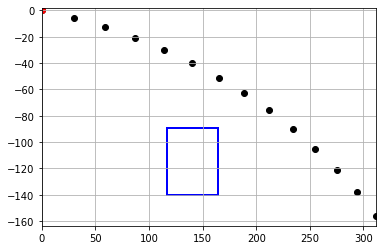

array([[   0,    0],
       [  30,   -6],
       [  59,  -13],
       [  87,  -21],
       [ 114,  -30],
       [ 140,  -40],
       [ 165,  -51],
       [ 189,  -63],
       [ 212,  -76],
       [ 234,  -90],
       [ 255, -105],
       [ 275, -121],
       [ 294, -138],
       [ 312, -156]])

In [5]:
## get path
x = np.array([0, 0])
v = np.array([30, -6])
path, error_code = get_path(x, v, target_area)
print(f"error_code: {error_code}")
disp_path(target_area, path)

# ## another way to get path.
# v_x_0 = 6
# v_y_0 = 9
# path = [[0, 0]]
# for t in range(1, 21):
#     path.append([get_x(v_x_0, t), get_y(v_y_0, t)])
# path = np.array(path)
path

In [6]:
# ## part 1.
# x = np.array([0, 0])
# #for x_x in range(x_min, x_max):
# for v_x in [15]:
#     y_maxs = []
#     for v_y in range(100, 300):
#         v = np.array([v_x, v_y])
#         y_max, error_code = get_ymax(x, v, target_area)
#         if error_code == 0:
#             y_maxs.append([v_y, y_max])
#        # print(f"y_maxs: {y_maxs}, {have_peak3(y_maxs)}")

# ## visualize
# y_maxs = np.array(y_maxs)
# plt.plot(y_maxs[:, 0], y_maxs[:, 1], 'o-')

# ## max value
# y_max = y_maxs[-1, 1]
# print(f"max height: {y_max}")

In [11]:
## part 2.
time0 = time.time()
x = np.array([0, 0])
options = []
for v_x in range(1, target_area[0][1]+1):
    print(f"{v_x}")
    for v_y in range(-1000, 1000):
        #print(f"{v_x}, {v_y}")
        v = np.array([v_x, v_y])
        _, error_code = get_path(x, v, target_area)
        if error_code == 0:
            options.append([v_x, v_y])
print(f"elapsed time: {time.time()-time0} [s]")    
print(f"number of possible combinations: {len(options)}")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
elapsed time: 27487.69225025177 [s]
number of possible combinations: 4110


In [ ]:
# import re

# with open("day17_sample.txt") as f:
#     lines = f.read().strip().split('\n')

# options_ = []
# for line in lines:
#     #print(line)
#     result = re.findall(r'([\-\d]+),([\-\d]+)', line)
#     v = [[int(r[0]), int(r[1])] for r in result]
#     options_.extend(v)
# np.shape(options_)

# #np.sort(path_)
# options_ = sorted(options_, key=lambda row: row[0])
# options_